In [26]:
from collections import deque
import numpy as np
import pandas as pd

import datetime as dt
from datetime import datetime, timedelta
import time
import math

Imprting Data from excel File using pandas lib

In [27]:
Data = pd.read_excel('Vol.xlsx', sheet_name='Vol')
Data.info

<bound method DataFrame.info of           Date       HPA       HPD  Cie  Ligne  Esc 1  Immat Type app   PKG  \
0   2022-04-09       NaN  07:15:00  DAH   4000    TUN  7TVKD     B738   P18   
1   2022-04-09       NaN  07:30:00  DTH   1400    RNS  7TVCL     DH8D   PA1   
2   2022-04-09       NaN  07:30:00  DTH   1408    RNS  7TVCR     DH8D   PA1   
3   2022-04-09       NaN  08:00:00  DAH   6258    CZL  7TVUK    ATR72   PA1   
4   2022-04-09       NaN  08:00:00  DTH   2320    AZR  7TVCE     B738   PA1   
..         ...       ...       ...  ...    ...    ...    ...      ...   ...   
189 2022-04-10       NaN  18:40:00  DAH   6006  7TVKD   B738      AAE  P11A   
190 2022-04-10  19:55:00       NaN  DAH   1041  7TVKK   B738      NCE   P19   
191 2022-04-10  20:30:00       NaN  DAH   4003  7TVKM   B738      TUN   P15   
192 2022-04-10       NaN  22:45:00  DAH   4062  7TVJA   A330      DXB   P21   
193 2022-04-10  22:50:00       NaN  AZA    802    NaN   A320      FCO   P16   

          Remarque 

In [28]:
Data.head

<bound method NDFrame.head of           Date       HPA       HPD  Cie  Ligne  Esc 1  Immat Type app   PKG  \
0   2022-04-09       NaN  07:15:00  DAH   4000    TUN  7TVKD     B738   P18   
1   2022-04-09       NaN  07:30:00  DTH   1400    RNS  7TVCL     DH8D   PA1   
2   2022-04-09       NaN  07:30:00  DTH   1408    RNS  7TVCR     DH8D   PA1   
3   2022-04-09       NaN  08:00:00  DAH   6258    CZL  7TVUK    ATR72   PA1   
4   2022-04-09       NaN  08:00:00  DTH   2320    AZR  7TVCE     B738   PA1   
..         ...       ...       ...  ...    ...    ...    ...      ...   ...   
189 2022-04-10       NaN  18:40:00  DAH   6006  7TVKD   B738      AAE  P11A   
190 2022-04-10  19:55:00       NaN  DAH   1041  7TVKK   B738      NCE   P19   
191 2022-04-10  20:30:00       NaN  DAH   4003  7TVKM   B738      TUN   P15   
192 2022-04-10       NaN  22:45:00  DAH   4062  7TVJA   A330      DXB   P21   
193 2022-04-10  22:50:00       NaN  AZA    802    NaN   A320      FCO   P16   

          Remarque   

In [29]:
Data.shape
Data= Data.astype({"Date": str}, errors='raise')

We needed to make the data col as string because pands automaticly detaxted dates , but it made it deficult for us to process 

In [30]:
Data.info()
print(Data['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      194 non-null    object
 1   HPA       95 non-null     object
 2   HPD       99 non-null     object
 3   Cie       194 non-null    object
 4   Ligne     194 non-null    int64 
 5   Esc 1     172 non-null    object
 6   Immat     180 non-null    object
 7   Type app  194 non-null    object
 8   PKG       194 non-null    object
 9   Remarque  194 non-null    object
 10  Comment   170 non-null    object
 11  Terminal  194 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.3+ KB
0      2022-04-09
1      2022-04-09
2      2022-04-09
3      2022-04-09
4      2022-04-09
          ...    
189    2022-04-10
190    2022-04-10
191    2022-04-10
192    2022-04-10
193    2022-04-10
Name: Date, Length: 194, dtype: object


In [31]:

Time=[]
for i in range (len(Data)):
    if pd.notna(Data['HPA'][i]) : #Convert heure prevu d'accostage and adding to her the exact date
        Time.append(str(Data["Date"][i])+" "+str(Data['HPA'][i]))
    elif pd.notna(Data['HPD'][i]) :#Convert heure prevu d'essacostage and adding to her the exact date
        Time.append(str(Data["Date"][i])+" "+str(Data['HPD'][i]))
    else:
        Time.append(float('nan'))

print(Time)
Data['DATETIME']=Time #creating a new col in the table with the datetime for the operation .
print(Data)

['2022-04-09 07:15:00', '2022-04-09 07:30:00', '2022-04-09 07:30:00', '2022-04-09 08:00:00', '2022-04-09 08:00:00', '2022-04-09 08:15:00', '2022-04-09 08:45:00', '2022-04-09 08:45:00', '2022-04-09 08:50:00', '2022-04-09 09:00:00', '2022-04-09 09:10:00', '2022-04-09 09:10:00', '2022-04-09 09:10:00', '2022-04-09 09:10:00', '2022-04-09 09:15:00', '2022-04-09 09:15:00', '2022-04-09 09:15:00', '2022-04-09 09:20:00', '2022-04-09 09:45:00', '2022-04-09 09:45:00', '2022-04-09 10:00:00', '2022-04-09 10:00:00', '2022-04-09 10:00:00', '2022-04-09 10:10:00', '2022-04-09 10:15:00', '2022-04-09 10:20:00', '2022-04-09 10:20:00', '2022-04-09 10:25:00', '2022-04-09 10:30:00', '2022-04-09 10:30:00', '2022-04-09 10:30:00', '2022-04-09 10:35:00', '2022-04-09 10:50:00', '2022-04-09 10:50:00', '2022-04-09 11:00:00', '2022-04-09 11:00:00', '2022-04-09 11:05:00', '2022-04-09 11:20:00', '2022-04-09 11:35:00', '2022-04-09 11:45:00', '2022-04-09 11:45:00', '2022-04-09 12:00:00', '2022-04-09 12:05:00', '2022-04-0

In [32]:

TimeGap=input('Give a Time GAP equal or bigger to 6  :') #input gap time based on the need and calculation 
TimeGap=int(TimeGap)
def Trans_to_min(x):
    D=x.day*24*60
    min = x.minute
    H = x.hour *60
    return int(D+min+H)
# this fenction transfer the date time into a number , we transfered the date into munites also , because in the night shift , the 00:00 comes after 23:00 , so we needed another variable to tell us that the day changed

Graph_intervale=[]

for i in range(len(Data)):
    try:
        Graph_intervale.append([])
        Time[i] = dt.datetime.strptime(str(Time[i]), '%Y-%d-%m %H:%M:%S')
        min= Time[i]- dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(min))
        max= Time[i]+ dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(max))
    except:
        Time[i] = dt.datetime.strptime(str(Time[i]), '%d-%m-%Y %H:%M:%S')
        min= Time[i]- dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(min))
        max= Time[i]+ dt.timedelta(minutes=TimeGap//2)
        Graph_intervale[i].append(Trans_to_min(max)) 
print((Graph_intervale))
Data['Graph_intervale']=Graph_intervale


[[6192, 6198], [6207, 6213], [6207, 6213], [6237, 6243], [6237, 6243], [6252, 6258], [6282, 6288], [6282, 6288], [6287, 6293], [6297, 6303], [6307, 6313], [6307, 6313], [6307, 6313], [6307, 6313], [6312, 6318], [6312, 6318], [6312, 6318], [6317, 6323], [6342, 6348], [6342, 6348], [6357, 6363], [6357, 6363], [6357, 6363], [6367, 6373], [6372, 6378], [6377, 6383], [6377, 6383], [6382, 6388], [6387, 6393], [6387, 6393], [6387, 6393], [6392, 6398], [6407, 6413], [6407, 6413], [6417, 6423], [6417, 6423], [6422, 6428], [6437, 6443], [6452, 6458], [6462, 6468], [6462, 6468], [6477, 6483], [6482, 6488], [6502, 6508], [6507, 6513], [6507, 6513], [6537, 6543], [6542, 6548], [6547, 6553], [6552, 6558], [6557, 6563], [6557, 6563], [6562, 6568], [6572, 6578], [6617, 6623], [6627, 6633], [6627, 6633], [6627, 6633], [6627, 6633], [6632, 6638], [6657, 6663], [6667, 6673], [6672, 6678], [6672, 6678], [6677, 6683], [6677, 6683], [6682, 6688], [6692, 6698], [6707, 6713], [6717, 6723], [6717, 6723], [6717

we transftered into munites every variables for us to create an interval of time .

In [33]:
Brigade=[]
for i in range (len(Data)):
    if (Time[i].hour >=0 and Time[i].hour<=7) or (Time[i].hour >=19 and Time[i].hour<=23): 
        Brigade.append("Nuit")
    else:
        Brigade.append("Journee")
Data['Brigade']=Brigade
print(Data)

           Date       HPA       HPD  Cie  Ligne  Esc 1  Immat Type app   PKG  \
0    2022-04-09       NaN  07:15:00  DAH   4000    TUN  7TVKD     B738   P18   
1    2022-04-09       NaN  07:30:00  DTH   1400    RNS  7TVCL     DH8D   PA1   
2    2022-04-09       NaN  07:30:00  DTH   1408    RNS  7TVCR     DH8D   PA1   
3    2022-04-09       NaN  08:00:00  DAH   6258    CZL  7TVUK    ATR72   PA1   
4    2022-04-09       NaN  08:00:00  DTH   2320    AZR  7TVCE     B738   PA1   
..          ...       ...       ...  ...    ...    ...    ...      ...   ...   
189  2022-04-10       NaN  18:40:00  DAH   6006  7TVKD   B738      AAE  P11A   
190  2022-04-10  19:55:00       NaN  DAH   1041  7TVKK   B738      NCE   P19   
191  2022-04-10  20:30:00       NaN  DAH   4003  7TVKM   B738      TUN   P15   
192  2022-04-10       NaN  22:45:00  DAH   4062  7TVJA   A330      DXB   P21   
193  2022-04-10  22:50:00       NaN  AZA    802    NaN   A320      FCO   P16   

          Remarque                 Comm

In [34]:
#Select Brigate
Date=input('Input your the date you want')
Brigade=input('Input the brigade you want ')

In [35]:

if Brigade=='Journee':
    Selected_Data=Data.loc[(Data['Date'] == Date) & (Data['Brigade'] == Brigade) ]
if Brigade=='Nuit':
    Time01 = dt.datetime.strptime(str(Date)+" 19:00:00", '%Y-%m-%d %H:%M:%S')
    Time02 = dt.datetime.strptime(str(Date)+" 08:00:00", '%Y-%m-%d %H:%M:%S')

    Time01=Trans_to_min(Time01)
    Time02=Trans_to_min(Time02) + 24*60
    print(Time01)
    print(Time02)
    Selected=[]
    for i in range(len(Data)):
        Time = dt.datetime.strptime(Data['DATETIME'][i], '%Y-%m-%d %H:%M:%S')
        Time=Trans_to_min(Time)
        if Time >= Time01 and Time < Time02 :
            Selected.append(Data['DATETIME'][i])
    Selected_Data = Data.loc[Data['DATETIME'].isin(Selected)]

print(Selected_Data)


          Date       HPA       HPD  Cie  Ligne Esc 1  Immat Type app   PKG  \
3   2022-04-09       NaN  08:00:00  DAH   6258   CZL  7TVUK    ATR72   PA1   
4   2022-04-09       NaN  08:00:00  DTH   2320   AZR  7TVCE     B738   PA1   
5   2022-04-09       NaN  08:15:00  DAH   6170   AAE  7TVUM    ATR72   PA1   
6   2022-04-09       NaN  08:45:00  DAH   6180   ORN  7TVUT    ATR72   PA1   
7   2022-04-09       NaN  08:45:00  DTH   1154   HME  7TVCD     B738  P10C   
..         ...       ...       ...  ...    ...   ...    ...      ...   ...   
91  2022-04-09  18:20:00       NaN  DAH   3017   IST  7TVKO     B738   P15   
92  2022-04-09       NaN  18:20:00  DAH   6026   CZL  7TVJU     B736  P11A   
93  2022-04-09       NaN  18:30:00  DAH   6106   ORN  7TVJS     B736    P9   
94  2022-04-09  18:40:00       NaN  DAH   6193   CZL  7TVKE     B738   P12   
95  2022-04-09       NaN  18:40:00  DAH   6006   AAE  7TVKL     B738  P10C   

         Remarque                  Comment Terminal            

Slection of the brigade based on the need , the pd.loc will filter based on the condition ,but the indexes will stay the same.

In [36]:
Graph_intervale=Selected_Data["Graph_intervale"]
Graph_intervale=np.array(Graph_intervale) #doing array to remove the indexes from the selections before , also sice we require a type list for our code to work 
print(Graph_intervale)

Graph01=Selected_Data.loc[Selected_Data['Terminal'] == 'T1']
Graph01=np.array(Graph01["Graph_intervale"])
Graph02=Selected_Data.loc[Selected_Data['Terminal'] == 'T2']
Graph02=np.array(Graph02["Graph_intervale"])
Graph03=Selected_Data.loc[Selected_Data['Terminal'] == 'T4']
Graph03=np.array(Graph03["Graph_intervale"])

[list([6237, 6243]) list([6237, 6243]) list([6252, 6258])
 list([6282, 6288]) list([6282, 6288]) list([6287, 6293])
 list([6297, 6303]) list([6307, 6313]) list([6307, 6313])
 list([6307, 6313]) list([6307, 6313]) list([6312, 6318])
 list([6312, 6318]) list([6312, 6318]) list([6317, 6323])
 list([6342, 6348]) list([6342, 6348]) list([6357, 6363])
 list([6357, 6363]) list([6357, 6363]) list([6367, 6373])
 list([6372, 6378]) list([6377, 6383]) list([6377, 6383])
 list([6382, 6388]) list([6387, 6393]) list([6387, 6393])
 list([6387, 6393]) list([6392, 6398]) list([6407, 6413])
 list([6407, 6413]) list([6417, 6423]) list([6417, 6423])
 list([6422, 6428]) list([6437, 6443]) list([6452, 6458])
 list([6462, 6468]) list([6462, 6468]) list([6477, 6483])
 list([6482, 6488]) list([6502, 6508]) list([6507, 6513])
 list([6507, 6513]) list([6537, 6543]) list([6542, 6548])
 list([6547, 6553]) list([6552, 6558]) list([6557, 6563])
 list([6557, 6563]) list([6562, 6568]) list([6572, 6578])
 list([6617, 6

In [37]:
def Verify_in_interval(M1,M2):
    if M1[0]<=M2[0] and M1[1]>=M2[0]:
        return True
    elif M1[0]<=M2[1] and M1[1]>=M2[1]:
        return True
    else: 
        return False 
def   listAdj(M):
    listAdj=[]
    for i in range(len(M)):
        listAdj.append([])
        for j in [x for x in range(len(M)) if x != i]:
            if Verify_in_interval(M[i],M[j]) or Verify_in_interval(M[j],M[i]) :
                listAdj[i].append(j)
            else:
                pass
    return listAdj
            #print(listAdj[i])
    #print(listAdj[i])
# print(M)
Adj=listAdj(Graph_intervale)
print(Adj)

Adj01=listAdj(Graph01)
Adj02=listAdj(Graph02)
Adj03=listAdj(Graph03)

[[1], [0], [], [4, 5], [3, 5], [3, 4], [], [8, 9, 10, 11, 12, 13], [7, 9, 10, 11, 12, 13], [7, 8, 10, 11, 12, 13], [7, 8, 9, 11, 12, 13], [7, 8, 9, 10, 12, 13, 14], [7, 8, 9, 10, 11, 13, 14], [7, 8, 9, 10, 11, 12, 14], [11, 12, 13], [16], [15], [18, 19], [17, 19], [17, 18], [21], [20, 22, 23], [21, 23, 24], [21, 22, 24], [22, 23, 25, 26, 27], [24, 26, 27, 28], [24, 25, 27, 28], [24, 25, 26, 28], [25, 26, 27], [30], [29], [32, 33], [31, 33], [31, 32], [], [], [37], [36], [39], [38], [41, 42], [40, 42], [40, 41], [44], [43, 45], [44, 46], [45, 47, 48], [46, 48, 49], [46, 47, 49], [47, 48], [], [], [53, 54, 55, 56], [52, 54, 55, 56], [52, 53, 55, 56], [52, 53, 54, 56], [52, 53, 54, 55], [], [59, 60], [58, 60, 61, 62], [58, 59, 61, 62], [59, 60, 62, 63], [59, 60, 61, 63], [61, 62], [], [], [67, 68, 69], [66, 68, 69], [66, 67, 69], [66, 67, 68], [], [72, 73, 74], [71, 73, 74], [71, 72, 74], [71, 72, 73], [76], [75], [78], [77, 79], [78, 80], [79], [], [83, 84], [82, 84], [82, 83], [86, 87],

In [38]:
def matriceAdj(Adj):
    Mat=[]
    for i in range( len(Adj)):
        Mat.append([])
        for j in range( len(Adj)):
            Mat[i].append(0)
            for k in range(len(Adj[i])):
                if j==Adj[i][k]:
                    Mat[i][j]=1
    return Mat

In [39]:
def arret(M):
    ex=[[],[]]
    for i in range (len(M)-1):
        for j in range(i+1,len(M)):
            if M[i][j]==1:
                ex[0].append(i)
                ex[1].append(j)
    return ex
#Create a list of start and end of each arret in our graph

In [40]:
Mat=matriceAdj(Adj)
Mat= np.array(Mat)
print (Mat)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


In [41]:
Ex=arret(Mat)
print("ex1= ",Ex[0])
print("ex2= ",Ex[1])


print(len(Ex[0]))

ex1=  [0, 3, 3, 4, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 15, 17, 17, 18, 20, 21, 21, 22, 22, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 29, 31, 31, 32, 36, 38, 40, 40, 41, 43, 44, 45, 46, 46, 47, 47, 48, 52, 52, 52, 52, 53, 53, 53, 54, 54, 55, 58, 58, 59, 59, 59, 60, 60, 61, 61, 62, 66, 66, 66, 67, 67, 68, 71, 71, 71, 72, 72, 73, 75, 77, 78, 79, 82, 82, 83, 85, 85, 86, 88, 91]
ex2=  [1, 4, 5, 5, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 10, 11, 12, 13, 11, 12, 13, 12, 13, 14, 13, 14, 14, 16, 18, 19, 19, 21, 22, 23, 23, 24, 24, 25, 26, 27, 26, 27, 28, 27, 28, 28, 30, 32, 33, 33, 37, 39, 41, 42, 42, 44, 45, 46, 47, 48, 48, 49, 49, 53, 54, 55, 56, 54, 55, 56, 55, 56, 56, 59, 60, 60, 61, 62, 61, 62, 62, 63, 63, 67, 68, 69, 68, 69, 69, 72, 73, 74, 73, 74, 74, 76, 78, 79, 80, 83, 84, 84, 86, 87, 87, 89, 92]
108


In [68]:
def Gloton(Adj):
    n=len(Adj)
    NC=dict()
    C=[0 for k in range(n)]
    for i in range(n):
        NC[i]=[]
    def  rajouter(k,NC):
        if ((k in NC)==True):
            return NC
        else:
            NC.append(k)
            return NC
    i=0
    while i<=n-1:
        exist=True
        k=0
        while (exist==True):
            exist=k in NC[i]
            if (exist==True):
                k+=1
        C[i]=k    
        for j in range(len(Adj[i])):
            voisin=Adj[i][j]
            NC[voisin]=rajouter(k,NC[voisin])
        i+=1
    return C
C=Gloton(Adj)
C1=Gloton(Adj01)
C2=Gloton(Adj02)
C3=Gloton(Adj03)
def Maximum(C):
    min_Conducteur=0
    for i in C:
        if min_Conducteur<=i:
            min_Conducteur=i
    min_Conducteur+=1
    return min_Conducteur

min_Conducteur=(Maximum(C1)+Maximum(C2)+Maximum(C3))

print(min_Conducteur)
Conducteur=0
while (Conducteur<min_Conducteur):
    Conducteur=input('Give the number of drivers bigger or equale to     '+str(min_Conducteur)+'    ')
    Conducteur=int(Conducteur)

10


In [56]:
Mat1=np.array(matriceAdj(Adj01))
Mat2=np.array(matriceAdj(Adj02))
Mat3=np.array(matriceAdj(Adj03))

In [43]:
Slected_Terminal=np.array(Selected_Data['Terminal'])

Value_Terminal=[]
for i in range(len(Slected_Terminal)):
    if Slected_Terminal[i]=='T1':
        Value_Terminal.append(1)
    elif Slected_Terminal[i]=='T2':
        Value_Terminal.append(2)
    else:
        Value_Terminal.append(4)

print(Value_Terminal)
    

[2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 1, 4, 2, 2, 4, 2, 2, 2, 4, 2, 1, 4, 1, 2, 1, 2, 2, 4, 2, 2, 1, 2, 4, 2, 2, 4, 1, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2]


In [44]:
# %%
# Import of the pyomo module
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ

# Creation of a Concrete Model
model = ConcreteModel()

# %%
model.C = Set(initialize=range(Conducteur), doc='les Conducteur')
model.J = Set(initialize=range(len(Adj)), doc='les jobs')
model.A = Set(initialize=range(len(Ex[0])), doc='les arcs')
model.t = Set (initialize=[1,2,4], doc='Terminal')
# %%
model.n = Param(initialize=len(Adj), doc='le nombre de jobs')
model.c = Param(initialize=Conducteur, doc='le nombre de conducteur')
model.m = Param(initialize=len(Ex[1]), doc='les relations entre les arcs')
model.ex1 = Param(model.A,initialize=Ex[0], doc='extrémité 1')
model.ex2 = Param(model.A,initialize=Ex[1], doc='extrémité 2')
model.T = Param(model.J,initialize=Value_Terminal, doc='les Terminal Affecté')
# %%
model.x = Var(model.C, model.J,domain=Binary, doc='affectation conducteur')
model.alpha = Var(model.C, model.t,domain=Binary, doc='affectation conducteur au terminal')
model.v = Var(model.C,bounds=(0,None),domain=Integers, doc='les taches')
model.y = Var(model.t,bounds=(0,None),domain=Integers, doc='valeur de comparaison')

# %%
def Cotraint1(model,j):
  return sum(model.x[i,j] for i in model.C) == 1
model.C1 = Constraint(model.J, rule=Cotraint1, doc='verification daffectation')


def Contraint2(model,i,k):
  return ((model.x[i,model.ex1[k]]+model.x[i,model.ex2[k]])) <= 1  

model.C2 = Constraint (model.C,model.A, rule=Contraint2, doc='verification de non chevauchement ')

def Contraint3(model,i):
  return sum(model.x[i,j] for j in model.J)==model.v[i]

model.C3 = Constraint (model.C, rule=Contraint3, doc='une seul tache par conducteur')

def Contraint4(model,i,k):
  return (model.alpha[i,k]*model.v[i]<=model.y[k])

model.C4 = Constraint (model.C,model.t, rule=Contraint4, doc='maximiser')

def Contraint5(model,i):
  return sum(model.alpha[i,k] for k in model.t) == 1
model.C5 = Constraint(model.C, rule=Contraint5, doc='verification daffectation de terminal')

def Contraint6(model,i,j):
  return (model.alpha[i,model.T[j]] >= model.x[i,j] )
model.C6 = Constraint(model.C,model.J, rule=Contraint6, doc='verification daffectation au t')
# %%

# %%
def objective_rule(model):
  return sum(model.y[k] for k in model.t)
model.objective = Objective(rule=objective_rule, sense=minimize, doc='Define objective function')

# %%
def pyomo_postprocess(options=None, instance=None, results=None):
  model.x.display()
# %%


opt = SolverFactory("gurobi")
results = opt.solve(model,tee=True)
#sends results to stdout
results.write()
print("\nDisplaying Solution\n" + '-'*60)
pyomo_postprocess(None, model, results)
# %%




Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-10
Read LP format model from file C:\Users\pc\AppData\Local\Temp\tmpslfrwxqf.pyomo.lp
Reading time = 0.01 seconds
x974: 2124 rows, 974 columns, 5921 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2124 rows, 974 columns and 5921 nonzeros
Model fingerprint: 0xf4226226
Model has 30 quadratic constraints
Variable types: 1 continuous, 973 integer (960 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1231 rows and 1 columns
Presolve time: 0.02s
Presolved: 953 rows, 1003 columns, 4270 nonzeros
Variable types: 0 continuous, 1003 integer (960 binary)

Root relaxation: objective 0.000000e+00, 6

In [45]:
model.y.display()

y : valeur de comparaison
    Size=3, Index=t
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   4.0 :  None : False : False : Integers
      2 :     0 :  11.0 :  None : False : False : Integers
      4 :     0 :  12.0 :  None : False : False : Integers


In [46]:
model.v.display()
#verfy how much each driver is working per day

v : les taches
    Size=10, Index=C
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :     0 :  11.0 :  None : False : False : Integers
      1 :     0 :   4.0 :  None : False : False : Integers
      2 :     0 :  12.0 :  None : False : False : Integers
      3 :     0 :  11.0 :  None : False : False : Integers
      4 :     0 :  10.0 :  None : False : False : Integers
      5 :     0 :  11.0 :  None : False : False : Integers
      6 :     0 :   3.0 :  None : False : False : Integers
      7 :     0 :  10.0 :  None : False : False : Integers
      8 :     0 :  11.0 :  None : False : False : Integers
      9 :     0 :  10.0 :  None : False : False : Integers


In [47]:
x=model.x
Group_co=[]
Conducteur_ID=[0]*len(Adj)
for i in model.C:
    Group_co.append([])
    for j in model.J:
        if x[i,j].value == 1:
            Group_co[i].append(j)
            Conducteur_ID[j]=i

print(Group_co)
print(Conducteur_ID)

[[0, 11, 17, 23, 34, 39, 51, 52, 68, 75, 82], [48, 50, 56, 65], [9, 24, 30, 37, 40, 44, 47, 53, 63, 74, 87, 88], [5, 13, 19, 21, 35, 38, 45, 49, 57, 60, 71], [2, 4, 10, 15, 18, 66, 80, 81, 83, 92], [8, 28, 31, 41, 59, 64, 69, 76, 77, 79, 86], [36, 46, 62], [1, 3, 6, 7, 16, 27, 42, 54, 90, 91], [14, 20, 22, 25, 29, 33, 58, 61, 73, 85, 89], [12, 26, 32, 43, 55, 67, 70, 72, 78, 84]]
[0, 7, 4, 7, 4, 3, 7, 7, 5, 2, 4, 0, 9, 3, 8, 4, 7, 0, 4, 3, 8, 3, 8, 0, 2, 8, 9, 7, 5, 8, 2, 5, 9, 8, 0, 3, 6, 2, 3, 0, 2, 5, 7, 9, 2, 3, 6, 2, 1, 3, 1, 0, 0, 2, 7, 9, 1, 3, 8, 5, 3, 8, 6, 2, 5, 1, 4, 9, 0, 5, 9, 3, 9, 8, 2, 0, 5, 5, 9, 5, 4, 4, 0, 4, 9, 8, 5, 2, 2, 8, 7, 7, 4]


In [48]:
Selected_Data['Conducteur_ID']=Conducteur_ID
Selected_Data.drop('DATETIME', inplace=True, axis=1)
Selected_Data.drop('Graph_intervale', inplace=True, axis=1)

Selected_Data.head

C:\Users\pc\AppData\Local\Temp/ipykernel_25900/1035486003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected_Data['Conducteur_ID']=Conducteur_ID
c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<bound method NDFrame.head of           Date       HPA       HPD  Cie  Ligne Esc 1  Immat Type app   PKG  \
3   2022-04-09       NaN  08:00:00  DAH   6258   CZL  7TVUK    ATR72   PA1   
4   2022-04-09       NaN  08:00:00  DTH   2320   AZR  7TVCE     B738   PA1   
5   2022-04-09       NaN  08:15:00  DAH   6170   AAE  7TVUM    ATR72   PA1   
6   2022-04-09       NaN  08:45:00  DAH   6180   ORN  7TVUT    ATR72   PA1   
7   2022-04-09       NaN  08:45:00  DTH   1154   HME  7TVCD     B738  P10C   
..         ...       ...       ...  ...    ...   ...    ...      ...   ...   
91  2022-04-09  18:20:00       NaN  DAH   3017   IST  7TVKO     B738   P15   
92  2022-04-09       NaN  18:20:00  DAH   6026   CZL  7TVJU     B736  P11A   
93  2022-04-09       NaN  18:30:00  DAH   6106   ORN  7TVJS     B736    P9   
94  2022-04-09  18:40:00       NaN  DAH   6193   CZL  7TVKE     B738   P12   
95  2022-04-09       NaN  18:40:00  DAH   6006   AAE  7TVKL     B738  P10C   

         Remarque                

In [49]:

import xlwt
from tempfile import TemporaryFile

import xlwt
from xlwt.Workbook import *
from pandas import ExcelWriter
import xlsxwriter
book = pd.ExcelWriter('Conducteur'+str(Date)+'-'+str(Brigade)+'.xlsx', engine='xlsxwriter')
Selected_Data.to_excel(book, sheet_name='recaputulation ')

for i in model.C:
    DATA=Selected_Data.loc[Selected_Data['Conducteur_ID'] == i]
    DATA.drop('Conducteur_ID', inplace=True, axis=1)
    DATA.to_excel(book, sheet_name='Conducteur '+str(i+1))

book.save()


c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 3, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 3, 4, 0, 0, 1, 2, 0, 3, 1, 0, 0, 0, 1, 2, 3, 0, 0, 1, 2, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1]


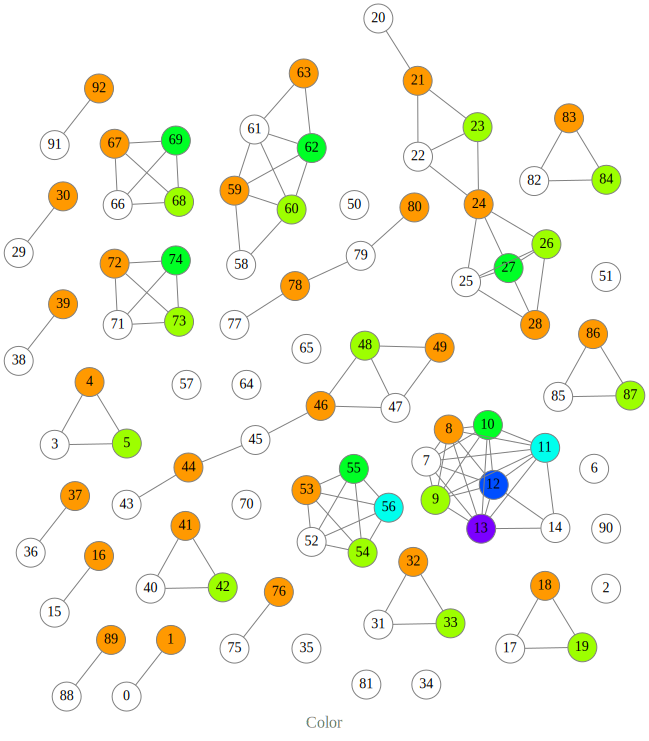

In [74]:


### Affichage de graphes, avec GraphViz

import numpy as np
from graphviz import Digraph, Graph
import matplotlib
import matplotlib.cm
# Fonction d'affichage d'un graphe a  partir d'une matrice d'adjacence
# M : matrice d'adjacence avec ou sans les poids (matrice numpy)
# directed : bool indiquant si le graphe est oriente ou non
# weighted : bool indiquant si les arcs du graphe sont pondere ou non
# label : si None les labels seront 0, 1, 2,..., n-1
# color : vecteur d'entiers contenant le numero associe a  la couleur
# title : nom du graphe
# view : bool qui determine l'ouverture d'une fenÃªtre de visualisation de l'image
# dispo : disposition des sommets. 
def display(M, directed = True, weighted = False, label = None, color = None, title = "G", view = False, dispo="neato"):
    # Nombre de sommets
    n = M.shape[0]
    # Labels des sommets
    if label == None:
        label = [str(i) for i in range(0, n)]
    # Couleur des sommets
    if color==None:
        lcol = [(1.,1.,1.,1.)]*n
    else:
        cm = matplotlib.cm.get_cmap('gist_rainbow')
        nbcol = Maximum(color)
        lcol = [cm(1.*x/nbcol) if x!=0 else (1.,1.,1.,1.) for x in color]
    # Initialisation du graphe
    if directed == True:
        t = Digraph(title, engine = dispo, format = 'svg')
    else:
        t = Graph(title, engine = dispo, format = 'svg')
    # Attibuts graphiques
    t.attr('graph', overlap = 'false', fontsize = '16', label = title, bgcolor = "#ffffff00",fontcolor="grey")
    t.attr('node', shape = 'circle', fixedsize = 'true', width = '0.4', fontsize = '14', style = "filled", color = 'grey')
    t.attr('edge', arrowsize = '0.7', fontsize = '12',color="grey",fontcolor="grey")
    # Ajout des sommets
    for i in range(0,M.shape[0]):
        #t.attr('node', fillcolor = "%f, %f, %f, %f" % lcol[i])
        t.attr('node', fillcolor = matplotlib.colors.to_hex(lcol[i], keep_alpha=False))
        t.node(str(label[i]))
    # Ajout des arcs (depend du type de matrice fournie : adjacence ou matrice de poids alacoutant)
    if weighted == False:
        for i in range(0,M.shape[0]):
            for j in range(0 if directed else i, M.shape[0]):
                if M[i,j]>0:
                    t.edge(str(label[i]),str(label[j]))
    else:
        for i in range(0,M.shape[0]):
            for j in range(0 if directed else i, M.shape[0]):
                if M[i,j]<float("inf"):
                    t.edge(str(label[i]),str(label[j]),label = str(M[i,j]))
    # Affichage
    if(view):
        t.view()
    else:
        t.render('output/'+title+'.gv', view=view)
    # Retour
    return(t)
print(C)
def Mat_int(C):
    C1=[0]*len(C)
    for i in range(len(C)):
        C1[i]=int(C[i])
    return C1
display(Mat,directed=False,title="Color",dispo="neato",color=Mat_int(C))

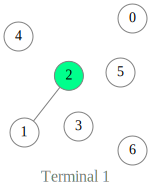

In [75]:
display(Mat1,directed=False,title="Terminal 1",dispo="neato",color=C1)

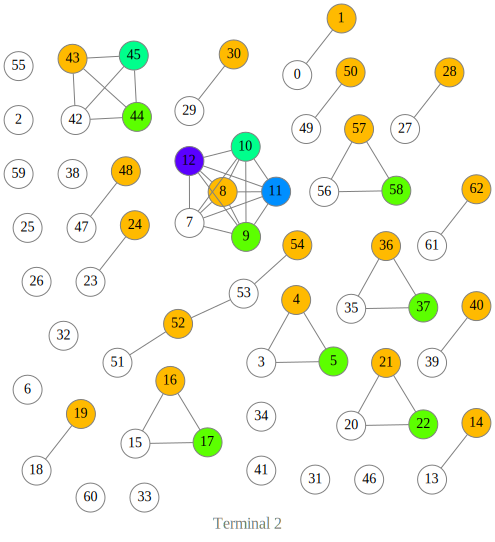

In [76]:
display(Mat2,directed=False,title="Terminal 2",dispo="neato",color=C2)

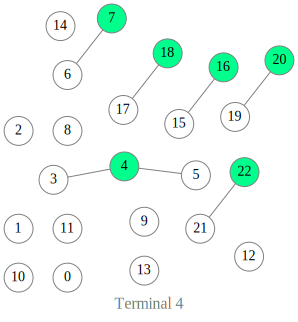

In [77]:
display(Mat3,directed=False,title="Terminal 4",dispo="neato",color=C3)

In [50]:
# Slected_DATETIME= np.array(Selected_Data['DATETIME'])
# Slected_Terminal=np.array(Selected_Data['Terminal'])
# Slected_PKG=np.array(Selected_Data['PKG'])
# Slected_HPA=np.array(Selected_Data['HPA'])
# Slected_HPD=np.array(Selected_Data['HPD'])
# Slected_date=np.array(Selected_Data['Date'])
# Slected_Cie=np.array(Selected_Data['Cie'])
# Slected_Esc1=np.array(Selected_Data['Esc 1'])
# Slected_Ligne=np.array(Selected_Data['Ligne'])
# Slected_Immat=np.array(Selected_Data['Immat'])
# Slected_Immat=np.array(Selected_Data['Type app'])

# import xlwt
# from tempfile import TemporaryFile

# import xlwt
# from xlwt.Workbook import *
# from pandas import ExcelWriter
# import xlsxwriter
# book = pd.ExcelWriter('Conducteur'+str(Date)+'-'+str(Brigade)+'.xlsx', engine='xlsxwriter')
# for i in range(len(Group_co)):
#     data=None
#     Terminal=[]
#     PKG=[]
#     date=[]
#     HPA=[]
#     HPD=[]
#     for j in Group_co[i]:
#         date.append(Slected_date[j])
#         HPA.append(Slected_HPA[j])
#         HPD.append(Slected_HPD[j])
#         Terminal.append(Slected_Terminal[j])
#         PKG.append(Slected_PKG[j])
    
#     DATA=list(zip(date, HPA,HPD,Terminal,PKG))
#     data=pd.DataFrame(DATA,columns=['date','HPA','HPD','Terminal','PKG'])
#     data.to_excel(book, sheet_name='Conducteur '+str(i+1))

# book.save()
